In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score


In [23]:
df = pd.read_csv("IMDB_Dataset.csv")
print (df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [24]:
# Define a function to clean each text entry

def clean_text(review):
    # Convert text to lowercase
    review = review.lower()
    
    # Remove punctuation and numbers
    review = re.sub(r"[^a-z\s]", "", review)
    
    # Remove extra spaces
    review = re.sub(r"\s+", " ", review).strip()
    
   
    stop_words = set(stopwords.words("english"))

      
    # Remove stopwords
    review = " ".join([word for word in review.split() if word not in stop_words])
    
    lemmatizer = WordNetLemmatizer()
    
    
     # Lemmatize each word
    review = " ".join([lemmatizer.lemmatize(word) for word in review.split()])
    return review

# Apply the cleaning function to the text column
df["cleaned_review"] = df["review"].apply(clean_text)

# Preview the cleaned data
print(df[[ "cleaned_review"]])

                                          cleaned_review
0      one reviewer mentioned watching oz episode you...
1      wonderful little production br br filming tech...
2      thought wonderful way spend time hot summer we...
3      basically there family little boy jake think t...
4      petter matteis love time money visually stunni...
...                                                  ...
49995  thought movie right good job wasnt creative or...
49996  bad plot bad dialogue bad acting idiotic direc...
49997  catholic taught parochial elementary school nu...
49998  im going disagree previous comment side maltin...
49999  one expects star trek movie high art fan expec...

[50000 rows x 1 columns]


In [25]:
print(df[["cleaned_review", "sentiment"]])

                                          cleaned_review sentiment
0      one reviewer mentioned watching oz episode you...  positive
1      wonderful little production br br filming tech...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically there family little boy jake think t...  negative
4      petter matteis love time money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job wasnt creative or...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary school nu...  negative
49998  im going disagree previous comment side maltin...  negative
49999  one expects star trek movie high art fan expec...  negative

[50000 rows x 2 columns]


In [26]:
new_df = df[["cleaned_review", "sentiment"]]
print(new_df)

                                          cleaned_review sentiment
0      one reviewer mentioned watching oz episode you...  positive
1      wonderful little production br br filming tech...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically there family little boy jake think t...  negative
4      petter matteis love time money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job wasnt creative or...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary school nu...  negative
49998  im going disagree previous comment side maltin...  negative
49999  one expects star trek movie high art fan expec...  negative

[50000 rows x 2 columns]


In [27]:

 X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

models = {
    #'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
   # 'Support Vector Machine': SVC(probability=True)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n" + "="*50 + "\n")

Model: Logistic Regression
Accuracy: 0.8941
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4364  597]
 [ 462 4577]]
Recall: 0.8941
F1 Score: 0.8941




Cross-Validation Accuracy Scores: [0.893125 0.890875 0.8935   0.885625 0.88775 ]
Mean Accuracy: 0.8902

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89     20039
    positive       0.88      0.90      0.89     19961

    accuracy                           0.89     40000
   macro avg       0.89      0.89      0.89     40000
weighted avg       0.89      0.89      0.89     40000



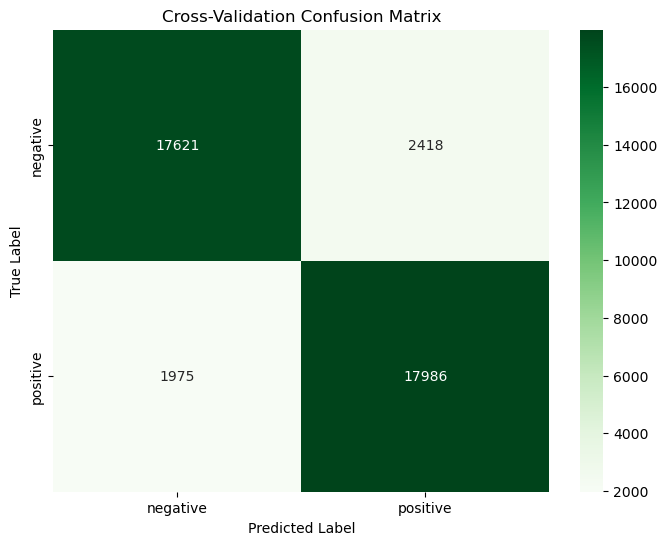

['tfidf_vectorizer.pkl']

In [28]:
# Cross-validation for additional insights (example for Logistic Regression)
log_reg_model = models['Logistic Regression']

# Perform cross-validation
cv_scores = cross_val_score(log_reg_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(log_reg_model, X_train_tfidf, y_train, cv=5)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print("\nClassification Report (Cross-Validation):\n", classification_report(y_train, cv_predictions))

# Plot confusion matrix for cross-validation predictions
conf_matrix_cv = confusion_matrix(y_train, cv_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Cross-Validation Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the trained model to a file
joblib.dump(model, 'sentiment_model.pkl')

# Save the TF-IDF vectorizer to a file
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

In [ ]:

# Load the saved model and vectorizer
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

def predict_sentiment(review):
    """
    Predict the sentiment of a given review.
    
    Parameters:
        review (str): The customer review text.
        
    Returns:
        str: The predicted sentiment (e.g., Positive, Negative, or Neutral).
        float: The confidence score for the prediction.
    """
    # Preprocess the input review (e.g., vectorize it)
    review_vectorized = vectorizer.transform([review])
    
    # Get prediction and confidence score
    prediction = model.predict(review_vectorized)[0]
    confidence = np.max(model.predict_proba(review_vectorized)) * 100
    
    return prediction, confidence

# Example usage
while True:
    user_input = input("Enter a review (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting the sentiment predictor. Goodbye!")
        break
    
    sentiment, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Confidence Score: {confidence:.2f}%\n")


Enter a review (or type 'exit' to quit): this is good movie
Predicted Sentiment: positive
Confidence Score: 88.39%

Enter a review (or type 'exit' to quit): this is not good
Predicted Sentiment: positive
Confidence Score: 93.92%

Enter a review (or type 'exit' to quit): this is trash
Predicted Sentiment: negative
Confidence Score: 83.30%

Enter a review (or type 'exit' to quit): do not watch this 
Predicted Sentiment: positive
Confidence Score: 55.99%

Enter a review (or type 'exit' to quit): this dialogue were not that great 
Predicted Sentiment: positive
Confidence Score: 92.43%

Enter a review (or type 'exit' to quit): disagree with the movie
Predicted Sentiment: positive
Confidence Score: 61.48%

Enter a review (or type 'exit' to quit): this is awesome
Predicted Sentiment: positive
Confidence Score: 95.30%

Enter a review (or type 'exit' to quit): this is negative
Predicted Sentiment: positive
Confidence Score: 65.26%

Enter a review (or type 'exit' to quit): this is bad
Predicted 